# Ch10 넘파이로 수치 데이터를 처리해보자

10.1 리스트보다 넘파이의 배열이 훨~씬~ 빠르다   
10.2 넘파이의 별칭 만들기, 그리고 간단한 배열 연산하   
10.3 강력한 넘파이 배열의 연산을 알아보자  
- LAB 10-1 ndarray 객체를 생성하고 속성을 알아보자   
- LAB 10-2 여러 사람의 BMI를 빠르고 간편하게 계산하기
  
10.4 인덱싱과 슬라이싱을 넘파이에서도 할 수 있다   
10.5 2차원 배열의 인덱싱   
10.6 넘파이 스타일의 2차원 배열 슬라이싱   
- LAB 10-3 2차원 배열 연습하기   
- LAB 10-4 넘파이 배열의 형태를 알아내고 슬라이싱하여 연산하기
  
10.7 arange() 함수와 range() 함수의 비교   
- LAB 10-5 2차원 배열에서 특정 조건을 만족하는 행만 추출하기
  
10.8 linspace() 함수와 logspace() 함수   
10.9 난수를 생성해보자   
10.10 정규 분포 난수 생성   
- LAB 10-6 배열의 형태를 바꾸어 보자   
- LAB 10-7 평균과 중앙값 계산 연습
  
10.11 상관관계 계산하기 

**이 장에서 배울 것들**    

넘파이를 사용하는 이유를 알아봅시다.   
넘파이가 제공하는 다차원 배열의 속성에 대하여 살펴보도록 합시다.    
넘파이의 강력한 기능을 직접 사용해 보며 익혀 봅시다.   
넘파이로 각종 확률 분포에서 난수를 생성해 데이터를 생성해 봅시다.    
고차원 배열의 인덱싱 기법에 대해서도 익숙해져 봅시다.   
넘파이가 제공하는 데이터 분석 함수를 살펴봅시다.   
다수 변수 간의 상관관계를 계산하는 일도 해 봅시다.    


## 10.1 리스트보다 넘파이의 배열이 훨~씬~ 빠르다

- 데이터 과학자들은 기본 리스트 대신에 넘파이Numpy를 선호한다.
- 넘파이는 대용량의 배열과 행렬 연산을 빠르게 수행하며, 고차원적인 수학 연산자와 함수를 포함하고 있는 파이썬 라이브러리이다.
- 파이썬의 리스트에 비하여 처리속도가 매우 빠름
- 데이터 분석이나 기계 학습 프로젝트를 수행한다면 넘파이에 대한 확실한 이해가 필수적이다.
- 데이터 분석을 위한 패키지인 판다스Pandas나 기계학습을 위한 Scikit-learn, Tensorflow 등이 넘파이를 기반으로 작동한다.

In [2]:
%timeit sum(range(10000))

136 µs ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
import numpy as np
%timeit np.sum(np.arange(10000))

8.64 µs ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


- 넘파이의 핵심적인 객체는 다차원 배열이다. 예를 들어서 정수들의 2차원 배열(테이블)을 넘파이를 이용해서 생성할 수 있다. 배열의 각 요소는 인덱스index라고 불리는 정수들로 참조된다.
- 넘파이에서 차원은 축axis이라고도 한다.

![276-2.png](276-2.jpg)

In [9]:
w = 5 # scalar
w = np.array(5)
w

array(5)

In [2]:
import numpy as np

In [4]:
x = np.array([2, 3, 4]) # 1차원 배열(array), 벡터(vector)
x

array([2, 3, 4])

In [6]:
y = np.array([[2, 3, 4], 
              [5, 6, 7]]) # 2 차원 배열, 행렬(matrix)
y

array([[2, 3, 4],
       [5, 6, 7]])

In [17]:
z = np.array([[2, 3, 4],
               [6, 7, 8], 
               [2, 3, 4], 
               [6, 7, 8],
              [[2, 3, 4],
               [6, 7, 8], 
               [2, 3, 4], 
               [6, 7, 8]]]) # 3차원 배열, Tensor
             

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [1]:
import numpy 
numpy.array(3)

array(3)

**리스트와 넘파이 배열은 무엇이 다른가**
- 넘파이는 성능이 우수한 ndarray 객체를 제공한다.
- 전통적으로 배열array은 동일한 자료형을 가진 데이터를 연속적으로 저장한다. 
- 파이썬의 리스트는 동일하지 않은 자료형을 가진 항목들을 담을 수 있다. 
- ndarray의 장점을 정리하면 아래와 같다.
    - C언어를 기반으로 작성. 빠르고 적은 메모리 점유
    - 배열을 이용한 수학적 연산 제공
    - 다양한 연산자와 함수 제공


**리스트와 넘파이 배열은 무엇이 다른가**

In [18]:
mid_scores = [70, 70, 80]
final_scores = [70, 80, 90]

mid_scores + final_scores

[70, 70, 80, 70, 80, 90]

In [19]:
[x + y for x, y in zip(mid_scores, final_scores)]

[140, 150, 170]

## 10.2 넘파이의 별칭 만들기, 그리고 간단한 배열 연산하기

In [ ]:
import numpy as np

mid_scores = np.array([70, 70, 80])
final_scores = np.array([70, 80, 90])

mid_scores + final_scores

**도전문제 10.1**
```
a = np.arrray(range(1, 11))
b = np.array(range(10, 101, 10))
b + a, b - a, b * a, b / a
```

In [21]:
a = np.array(range(1, 11))
b = np.array(range(10, 101, 10))
b + a, b - a, b * a, b/ a

(array([ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110]),
 array([ 9, 18, 27, 36, 45, 54, 63, 72, 81, 90]),
 array([  10,   40,   90,  160,  250,  360,  490,  640,  810, 1000]),
 array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]))

**다차원 배열ndarray의 속성**

In [38]:
x = np.array([1, 2, 3])

In [31]:
# 차원(dimension)
x.ndim

1

In [39]:
y.ndim

2

In [40]:
z.ndim

NameError: name 'z' is not defined

In [34]:
# 자료형(type)
type(z)

NameError: name 'z' is not defined

In [35]:
# 배열의 형태(shape)
y.shape
z.shape

NameError: name 'z' is not defined

In [36]:
# 항목의 수(size)
z.size

NameError: name 'z' is not defined

**도전문제 10.2**   

다음과 같이 결과를 출력해 보자.
```
a = np.arrray(range(1, 11)) + np.array(range(10, 101, 10))

a.shape

a.size
```

## 10.3 강력한 넘파이 배열의 연산을 알아보자

- +, -, *, /

In [41]:
salary = np.array([220, 250, 230])

In [42]:
salary = salary + 100 # bradcastiong
salary

array([320, 350, 330])

In [43]:
salary = salary * 2.1 
salary

array([672., 735., 693.])

In [44]:
salary = salary / 2
salary

array([336. , 367.5, 346.5])

넘파이의 계산은 왜 빠를까?

- 파이썬의 리스트는 아래의 코드와 같이 다양한 자료형의 값을 가질 수 있다. 하지만 넘파이는 각 배열마다 동일한 자료형의 데이터만 
가질 수 있다. 

In [45]:
lst = [3.0, 'park', 5, True]
lst

[3.0, 'park', 5, True]

In [46]:
array = np.array([3.0, 'park', 5, True])
array

array(['3.0', 'park', '5', 'True'], dtype='<U32')

**강력한 벡터화 연산을 적극 활용하자**

1에서 1000000까지의 정수를 하는 코드를 만든다.

In [48]:
# list
import time
st = time.time()
sum(range(1, 100000))
print(time.time() - st)

0.005629062652587891


In [49]:
# numpy
st = time.time()
np.sum(np.arange(1, 1000000))
print(time.time() - st)

0.002785921096801758


- **LAB10-1**nadrray 객체를 생성하고 속성을 알아보자

![lab10-1.png](lab10-1.png)

In [61]:
array_a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9] )
array_a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
array_b = np.array(range(10))
array_b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
array_c = np.array(range(0, 10, 2))
array_c

array([0, 2, 4, 6, 8])

In [63]:
array_c.shape # 5개의 원소를 가진다.

(5,)

In [64]:
array_c.ndim # 1차원 벡터

1

In [68]:
array_c.dtype # 32-bit 정수

dtype('int64')

In [69]:
type(array_c)

numpy.ndarray

**LAB10-2** 여러 사람의 BMI를 빠르고 간편하게 계산하기

![lab10-2.png](lab10-2.png)

In [72]:
heights = [1.83, 1.76, 1.69, 1.86, 1.77, 1.73]
weights = [86, 74, 59, 95, 80, 68]

bmi = [w / h ** 2 for h, w in zip(heights, weights)]
bmi

[25.680074054167036,
 23.889462809917354,
 20.65754000210077,
 27.45982194473349,
 25.53544639152223,
 22.720438370810918]

In [73]:
heights = np.array(heights)
weights = np.array(weights)

bmi = weights / heights ** 2
bmi

array([25.68007405, 23.88946281, 20.65754   , 27.45982194, 25.53544639,
       22.72043837])

## 10.4 인덱싱과 슬라이싱을 넘파이에서도 할 수 있다

In [75]:
scores = np.array([88, 72, 93, 94, 89, 78, 99])

In [76]:
# indexing
scores[3]

94

In [77]:
scores[-1]

99

In [79]:
# slicing
scores[2:5]

array([93, 94, 89])

In [80]:
scores[:3]

array([88, 72, 93])

In [81]:
scores[4:]

array([89, 78, 99])

In [82]:
scores[::2]

array([88, 93, 89, 99])

In [83]:
# 요소의 변경
scores[3] = 80
scores

array([88, 72, 93, 80, 89, 78, 99])

In [84]:
# 논리 인덱싱
scores[scores > 90]

array([93, 99])

## 10.5 2차원 배열의 인덱싱


In [85]:
num_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
np_array = np.array(num_list)
np_array.shape

(3, 3)

In [86]:
np_array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [89]:
# indexing [row, col]
np_array[1, 2]

6

In [90]:
np_array[1, 0]

4

In [93]:
np_array[1]

array([4, 5, 6])

In [97]:
np_array[:,2]

array([3, 6, 9])

In [98]:
np_array[:,1]

array([2, 5, 8])

In [ ]:
# slicing [st:end:step, st:end:step]



슬라이싱 정리

![288-1.jpg](288-1.jpg)

In [105]:
A = np.arange(16).reshape(4, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [102]:
A[1:3, 1:3]

array([[ 5,  6],
       [ 9, 10]])

In [109]:
# 요소의 변경
A[1,1] = 50
A

array([[ 0,  1,  2,  3],
       [ 4, 50,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
# 논리 인덱싱

In [110]:
A[A > 10]

array([50, 11, 12, 13, 14, 15])

**LAB10-3** 2차원 배열 연습하기

![lab10-3.png](lab10-3.png)

수학 용어 정리
- 스칼라
- 벡터
- 행렬
- 텐서

**LAB10-4** 넘파이 배열의 형태 알아내고 슬라이싱하여 연산

![lab10-4.png](lab10-4.png)

In [ ]:
x = np.array([[1.83, 1.76, 1.69, 1.86, 1.77, 1.73],
              [86.0, 74.0, 59.0, 95.0, 80.0, 68.0]])


## 10.7 arange() 함수와 range() 함수의 비교

```
numpy.arange([start], stop, [step])

range([start], stop, [step])
```


In [2]:
import numpy as np
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(5)

In [ ]:
np.arange(1, 6, 2)

**LAB10-5** 2차원 배열에서 특정 조건을 만족하는 행만 추출하기

![lab10-5.png](lab10-5.png)

In [7]:
players = [[178, 76.4],
           [183, 86.2],
           [181, 78.5],
           [176, 80.1]]

In [9]:
players = np.array(players)
players.shape

(4, 2)

In [121]:
players = np.array(players)
players

array([[178. ,  76.4],
       [183. ,  86.2],
       [181. ,  78.5],
       [176. ,  80.1]])

In [123]:
players[players[:, 1] > 80]

array([[183. ,  86.2],
       [176. ,  80.1]])

In [124]:
players[players[:, 1] > 180]

array([], shape=(0, 2), dtype=float64)

## 10.8 linspace() 함수와 logspace() 함수
```
numpy.linspace(start, stop, num)
```

In [12]:
# np.arange(start, end, step)
np.linspace(0, 1, 10) # Linear space

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [13]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [14]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

**배열의 형태를 바꾸는 reshape() 메소드와 flatten() 메소드**

In [16]:
y = np.arange(12)

In [21]:
# reshape
z = y.reshape(3, 4)
z

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
# flatten
x = z.flatten()


## 10.9 난수를 생성해보자

In [ ]:
np.random.seed(43)
# probability density funcion(pdf) 

정규분포 난수
![298-1.jpg](298-1.jpg)

In [22]:
x = np.random.randn(10) # mu=0, sigma=1
x

array([ 0.46310138,  1.37140859,  2.11408388, -0.39844343,  1.0347903 ,
        0.92739794,  0.15828665, -1.53757016,  2.73922581, -0.68646377])

In [23]:
x = np.random.randn(5, 4) # mu=0, sigma=1
x

array([[-1.63090732,  1.54227913,  0.75138736, -0.08318795],
       [ 0.10673165,  1.34178487,  0.16645549,  1.71108807],
       [-1.48158643,  0.43135339, -1.24012611, -1.19293518],
       [ 1.53090381,  0.53306436,  0.06560022,  0.43945084],
       [ 0.17874585,  0.49047586,  0.31670233, -3.21000881]])

In [24]:
mu = 10
sigma = 2
x = mu + sigma * np.random.randn(5, 4)
x

array([[ 9.74813649, 11.23678018,  8.85475952,  9.02460659],
       [ 7.31191   , 12.02203369, 10.78760608,  9.33351902],
       [ 8.62533319,  9.87895612, 10.6367601 , 15.10499122],
       [ 9.04647285, 10.79106041,  8.46925864, 12.70033083],
       [ 9.89401953, 12.06971247, 10.11745358, 11.28268735]])

**평균과 중앙값 계산하기**

In [28]:
mu = 175
sigma = 10
heights = mu + sigma * np.random.randn(1000)
min(heights), max(heights)

(138.31936388767974, 206.79629323668212)

In [29]:
np.mean(heights)

175.14050576170504

In [30]:
np.std(heights) # 표준편찬(standard deviation) 

10.259958288326033

In [31]:
numbers = np.array([3, 7, 1, 2, 21])

In [32]:
sorted(numbers)

[1, 2, 3, 7, 21]

In [33]:
np.mean(numbers)

6.8

In [34]:
np.median(numbers)

3.0

In [ ]:
# 평균(mean)
numbers.sum() / len(numbers), np.mean(numbers)

In [ ]:
# 중앙값(median)


**LAB10-6 배열의 형태를 바꾸어 보자**

![lab10-6.png](lab10-6.png)

In [39]:
a = np.arange(1,37)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [41]:
b = a.reshape(3, 12)
b

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]])

In [45]:
c = a.reshape(4, 9)
c

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34, 35, 36]])

In [46]:
c[2, 5]

24

In [47]:
c[1:3, 3:5]

array([[13, 14],
       [22, 23]])

**LAB10-7** 평균과 중앙값 계산 연습

![lab10-7.png](lab10-7.png)

## 10.11 상관관계 계산하기

- 일반적으로 키가 큰 사람의 몸무게가 키가 작은 사람에 비해서 많이 나간다
- 공부하는 시간이 길면 점수가 높다.
- 운동을 시간이 길수록 몸무게가 적게 나간다.


In [49]:
heights = 175 + 10 * np.random.randn(1000)
weights = (heights - 110) + 5 * np.random.randn(1000)
np.corrcoef(heights, weights)

array([[1.        , 0.90400265],
       [0.90400265, 1.        ]])

In [48]:
import matplotlib.pyplot as plt

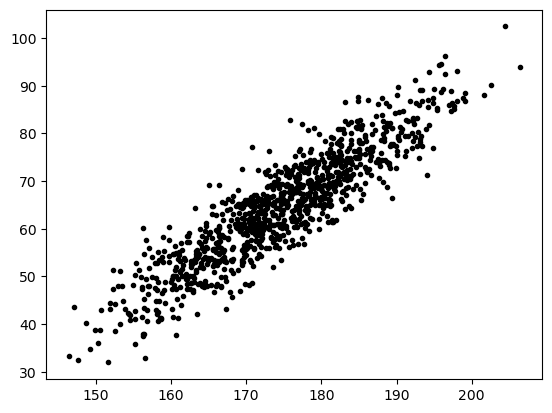

In [50]:
plt.plot(heights, weights, 'k.')
plt.show()

In [52]:
x = np.linspace(0, 100, 101)
y = np.sin(x)
np.corrcoef(x, y)

array([[ 1.        , -0.04738347],
       [-0.04738347,  1.        ]])

In [54]:
x = np.arange(100)
y = x ** 2
z = np.sin(3.14 * x / 100)

In [55]:
np.corrcoef([x, y, z])

array([[ 1.        ,  0.96764439,  0.03763255],
       [ 0.96764439,  1.        , -0.21532645],
       [ 0.03763255, -0.21532645,  1.        ]])

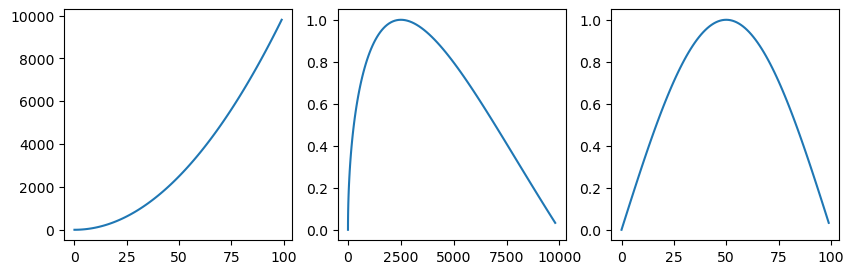

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.plot(x, y)
plt.subplot(1, 3, 2)
plt.plot(y, z)
plt.subplot(1, 3, 3)
plt.plot(x, z)
plt.show()